# **Linear Regression**

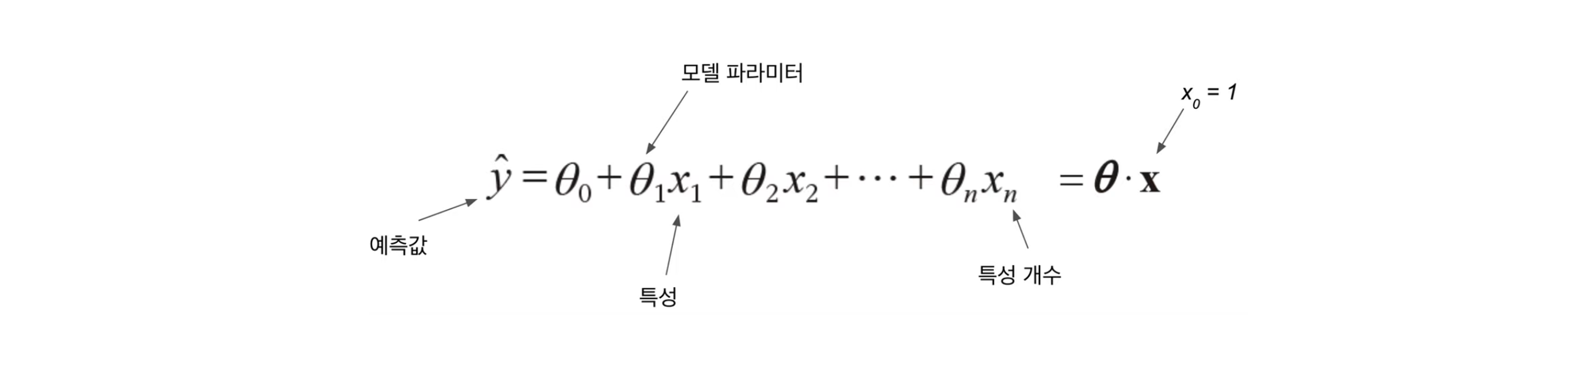

### Mean Squared Error (MSE)

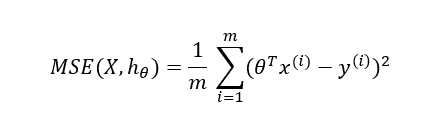

### Root Mean Squared Error (RMSE)

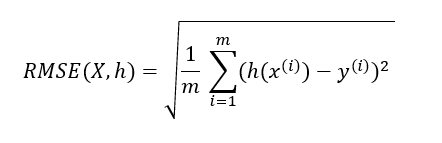

### 정규방정식 (Normal Eqaution)

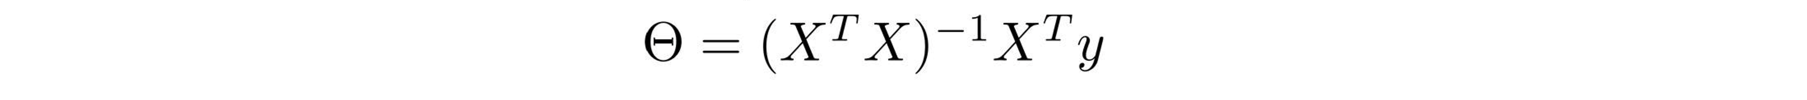

https://mazdah.tistory.com/831

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

### y = ㅁ + ㅁx

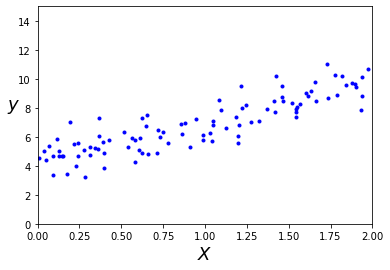

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

### y = ㅁx<sub>0</sub> + ㅁx<sub>1</sub>

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

### Normal equation

$
\hat{𝚯} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^Ty .
$

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

### y = 4.21509616 + 2.77011339x

In [7]:
X_new = np.array([[0], [2]]) # X가 0과 2라는 데이터를 가질 때
X_new_b = np.c_[np.ones((2, 1)), X_new] 
y_predict = X_new_b.dot(theta_best)
y_predict # theta_best를 통해 얻은 predict값이므로 theta_btest와 혼동 주의

array([[4.21509616],
       [9.75532293]])

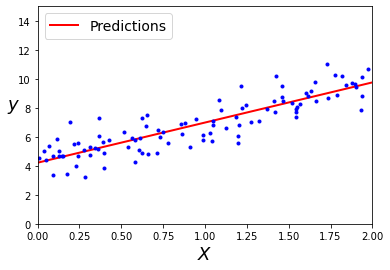

In [8]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [33]:
# 회귀 계수
model.intercept_, model.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
model.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# **Polynomial Regression**(비선형)

In [52]:
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(100, 1)

### y = ㅁ + ㅁx + ㅁx<sup>2</sup> 

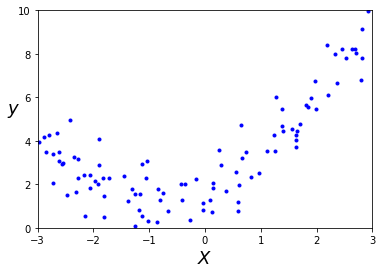

In [53]:
plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [54]:
from sklearn.preprocessing import PolynomialFeatures # 데이터 값을 degree만큼 제곱해서 데이터의 특징을 늘려줌

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [55]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [56]:
mdoel = LinearRegression()
model.fit(X_poly, y)
model.intercept_, model.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

### y = 1.78134581 + 0.93366893x + 0.56456263x<sup>2</sup>

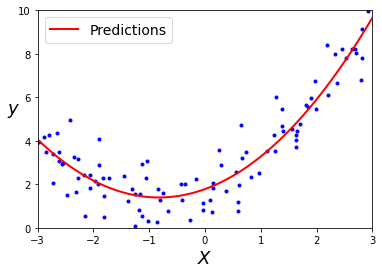

In [57]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

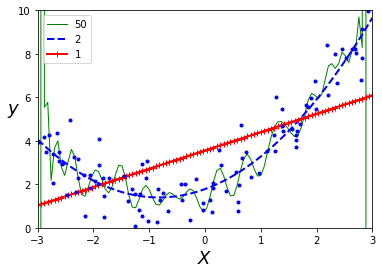

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 50), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    model = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("model", model),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

mean_squared_error(y_test, y_predict)

3.305260345729006

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

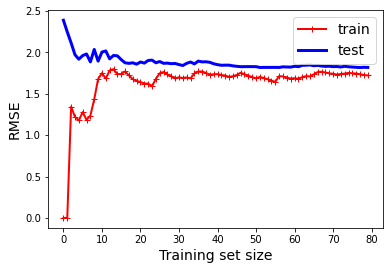

In [61]:
plot_learning_curves(polynomial_regression,X,y)

# **Regularized Linear Models**

### Ridge Regression

**Ridge Regression**는 규제(regularization)가 추가된 선형 회귀 모델이다. 규제항(regularization term) $\lambda \sum_{i=1}^{n}{𝚯_{i}^{2}}$ 이 비용함수(loss function)에 추가된다. 

따라서, 모델(알고리즘)을 데이터에 적합 시키는 것뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 한다. 규제항은 학습에만 사용되며 테스트 시에는 규제항이 사용되지 않는다.

$$
J(𝚯) = \text{MSE}(𝚯) + \lambda \sum_{i=1}^{m}{𝚯_{i}^{2}}
$$

위의 식에서 $\lambda$는 하이퍼파라미터이며, 모델을 얼마나 많이 규제할지 조절한다. $\lambda = 0$이면 Ridge Regression는 일반 Linear regression와 같아지며, $\lambda$가 커지게되면 모든 가중치가 거의 0에 가까워져, 결국 데이터의 평균을 지나는 선이 된다.

릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 데이터 스케일을 맞춰주는것이 중요하다.

In [63]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [64]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1, random_state=42)
ridge_model.fit(X, y)

Ridge(alpha=1, random_state=42)

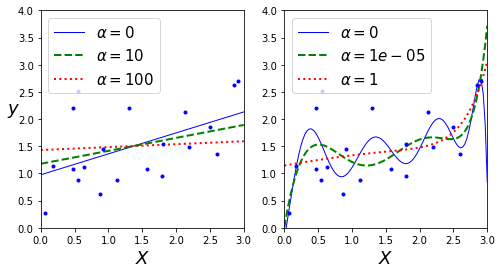

In [65]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$X$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)


plt.show()